In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
from datetime import datetime
from datetime import date
import csv
import matplotlib.pyplot as plt
import math
import imblearn
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from IPython.display import display_html
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
%%sh
http_proxy=http://10.245.5.249:8080
export http_proxy
https_proxy=https://10.245.5.249:8080
export https_proxy

pip install descartes

In [3]:
%%sh
http_proxy=http://10.245.5.249:8080
export http_proxy
https_proxy=https://10.245.5.249:8080
export https_proxy

pip install geopandas

In [5]:
import geopandas as gpd
import descartes

In [6]:
shp = gpd.read_file('gs://aes-datahub-0001-raw/TCMS/DPLshapefiles/DPLCircuitBoundary.shp')

In [7]:
shp.shape

(576, 5)

In [8]:
shp.head()

,OBJECTID,FEEDERID,Shape_Leng,Shape_Area,geometry
0,1,AB1201,3917.865878,198052.257041,"POLYGON ((1487501.238 635103.419, 1487416.895 ..."
1,2,AB1202,2355.118924,69302.037666,"MULTIPOLYGON (((1487388.046 635082.733, 148738..."
2,3,AB1203,6012.401394,164325.406277,"MULTIPOLYGON (((1486928.612 634541.770, 148693..."
3,4,AB1204,5156.670824,296335.119736,"MULTIPOLYGON (((1487085.275 634321.225, 148708..."
4,5,AB1206,11852.879079,542974.903505,"MULTIPOLYGON (((1487054.053 634315.679, 148705..."


In [93]:
shp_prim = gpd.read_file('gs://aes-datahub-0001-raw/TCMS/DPLshapefiles/PrimaryOverhead.shp')

In [95]:
shp_prim.head()

,OBJECTID,SUBTYPECD,GRIDNUMBER,FEEDERID,FEEDERID2,FEEDERINFO,NOMINALVOL,OPERATINGV,PHASEDESIG,LABELTEXT,LABELTEXT1,LABELTEXT2,CONDUCTORC,PHASEORIEN,PHASEDIREC,CIRCUITORI,CONDUCTORT,NEUTRALMAT,NEUTRALSIZ,NEUTRALTYP,PROJECTNUM,STAKEOUTWO,LINECLEARA,LASTTRIMDA,TRIMCONTRA,CONSTRUCTI,SOUNITID,ENABLED,CREATIONUS,DATECREATE,DATEMODIFI,LASTUSER,LENGTHSOUR,MEASUREDLE,ELECTRICTR,METERCONNE,SECONDARYC,DGNLEVEL,OWNER,INDEXPRINT,MS_PHASE_D,PHASE_SOUR,COMMENTS,FIELDCOMME,ORIGINALOB,INSTALLATI,TAXLOCATIO,ORIGINALFE,ORIGINAL_1,SHAPE_Leng,geometry
0,1,1,None,AN1203,None,4,200,210,1,None,6CU,None,None,C,None,None,OPN,CU,6,None,None,None,0.0,2014-12-31,None,5,None,1,MIGRATION,None,2018-09-19,richarr1,MS,225.418853,107374302,None,None,3,D,N,1,M,None,None,0,None,0432,AN1203,None,225.418853,"LINESTRING (1519748.850 663656.226, 1519717.85..."
1,2,3,None,AN1203,None,7,180,190,7,None,None,None,VERT,ABC,E,None,OPN,None,None,None,None,None,0.0,2014-12-31,None,5,None,1,sycksj,2013-10-03,2018-09-19,richarr1,MS,443.274861,187904931,None,None,1,D,N,7,M,None,None,0,None,0432,AN1203,None,443.274861,"LINESTRING (1511035.961 657412.093, 1510977.40..."
2,3,3,None,AN1203,None,7,180,190,7,None,1/0,None,HOR,CBA,E,None,OPN,None,1/0,None,None,None,0.0,2014-12-31,None,5,None,1,MIGRATION,None,2018-09-19,richarr1,MS,20.200039,187904931,None,None,1,D,N,7,M,None,None,0,None,0432,AN1203,None,20.200039,"LINESTRING (1512489.770 660398.740, 1512489.66..."
3,4,3,None,AN1203,None,7,200,210,7,None,477,None,HOR,ABC,E,None,OPN,ACSR,4/0,None,None,None,0.0,2014-12-31,None,5,None,1,MIGRATION,None,2018-09-19,richarr1,MS,1224.880599,187904939,None,None,1,D,Y,7,M,None,None,0,None,0415,AN1203,None,1224.880599,"LINESTRING (1521066.931 673561.230, 1521007.64..."
4,5,3,None,AN1203,None,7,200,210,7,None,477,None,HOR,ABC,S,None,OPN,ACSR,4/0,None,None,None,0.0,2014-12-31,None,5,None,1,degroor,2016-07-21,2018-09-19,richarr1,MS,142.279493,187904939,None,None,1,D,Y,7,M,None,None,0,None,0432,AN1203,None,142.279493,"LINESTRING (1515170.065 662238.016, 1515222.17..."


AttributeError: 'GeoDataFrame' object has no attribute 'show'

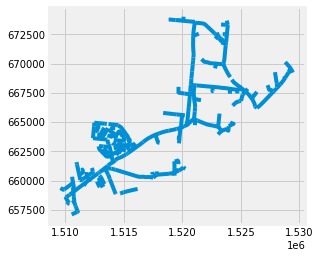

In [97]:
shp_prim.plot()
shp_prim.show()

In [98]:
shp_sec = gpd.read_file('gs://aes-datahub-0001-raw/TCMS/DPLshapefiles/SecondaryOverhead.shp')

In [99]:
shp_sec.head()

,OBJECTID,SUBTYPECD,GRIDNUMBER,OWNER,FEEDERID,FEEDERID2,FEEDERINFO,NOMINALVOL,OPERATINGV,PHASEDESIG,LABELTEXT,LABELTEXT1,LABELTEXT2,CONDUCTORC,CONDUCTORT,NEUTRALTYP,NEUTRALMAT,NEUTRALSIZ,PROJECTNUM,STAKEOUTWO,LINECLEARA,LASTTRIMDA,TRIMCONTRA,CONSTRUCTI,SOUNITID,ENABLED,CREATIONUS,DATECREATE,DATEMODIFI,LASTUSER,LENGTHSOUR,MEASUREDLE,ELECTRICTR,METERCONNE,SECONDARYC,NUMBEROFWI,DGNLEVEL,FIELDCOMME,ORIGINALOB,INSTALLATI,TAXLOCATIO,ORIGINALFE,ORIGINAL_1,CONDUCTORS,CONDUCTORM,NUMBERCOND,INSULATION,INSULATI_1,STREETLIGH,MANUFACTUR,FDRMGRNONT,SHAPE_Leng,geometry
0,1,1,None,D,None,None,0,30,30,0,4/0 TX,None,None,None,TPLX,None,None,4/0,None,None,0.0,None,None,5,None,1,MIGRATION,None,2013-12-21,degroor,MS,156.451657,4176,None,None,3,1,None,0,None,0432,None,None,4/0,None,1,BAR,None,None,None,1,156.451657,"LINESTRING (1513609.906 663327.600, 1513613.55..."
1,2,1,None,D,None,None,8,30,30,0,1/0 TX,None,None,None,TPLX,None,None,1/0,None,None,0.0,None,None,5,None,1,MIGRATION,None,2013-12-21,degroor,MS,98.249760,4176,None,None,3,1,None,0,None,0221,None,None,1/0,None,1,BAR,None,None,None,1,98.249761,"LINESTRING (1524381.233 668395.316, 1524382.09..."
2,3,3,None,D,None,None,0,0,0,0,6 DX,None,None,None,DPLX,None,None,6,None,None,0.0,None,None,5,None,1,MIGRATION,None,2015-09-25,STEWARC,MS,90.794032,4096,None,None,3,1,None,0,None,0432,None,None,6,None,1,BAR,None,None,None,1,90.794032,"LINESTRING (1514867.908 660845.983, 1514837.34..."
3,4,1,None,D,None,None,0,30,30,0,4/0 TX,None,None,None,TPLX,None,None,4/0,None,None,0.0,None,None,5,None,1,MIGRATION,None,2013-12-21,degroor,MS,191.244724,4176,None,None,3,1,None,0,None,0432,None,None,4/0,None,1,BAR,None,None,None,1,191.244724,"LINESTRING (1515823.173 663067.294, 1515816.19..."
4,5,1,None,D,None,None,0,30,30,0,1/0 TX,None,None,None,TPLX,None,None,1/0,None,None,0.0,None,None,5,None,1,MIGRATION,None,2013-12-21,degroor,MS,98.541007,4176,None,None,3,1,None,0,None,0432,None,None,1/0,None,1,BAR,None,None,None,1,98.541007,"LINESTRING (1519093.176 665781.223, 1519043.70..."


AttributeError: 'GeoDataFrame' object has no attribute 'show'

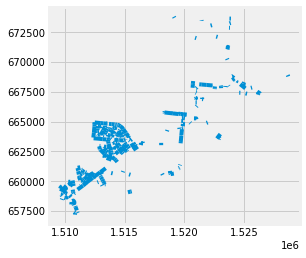

In [100]:
shp_sec.plot()
shp_sec.show()

In [66]:
shp1 = shp

In [85]:
shp1['POINTS'] = str(shp1.geometry)

In [67]:
df = pd.DataFrame(shp1.values)

In [68]:
df.head()

,0,1,2,3,4
0,1,AN1203,88189.9,1.54852e+08,"POLYGON ((1521697.833676726 674644.1700100452,..."


In [86]:
shp1 = shp1.iloc[:, [1, 2, 3, 5]]

In [87]:
shp1

,FEEDERID,SHAPE_Leng,SHAPE_Area,POINTS
0,AN1203,88189.881325,1.548521e+08,"0 POLYGON ((1521697.834 674644.170, 1522287..."


In [55]:
df1 = pd.DataFrame(shp1.iloc[:,:-1].values, columns = list(shp1.columns.values)[:-1] )

In [56]:
df1

,OBJECTID,FEEDERID,SHAPE_Leng,SHAPE_Area,geometry
0,1,AN1203,88189.9,1.54852e+08,"POLYGON ((1521697.833676726 674644.1700100452,..."


In [46]:
shp1 = pd.DataFrame(shp1)

In [49]:
shp2 = shp1

In [50]:
shp2['Geometry'] = str(shp.geometry)

In [52]:
shp2

,OBJECTID,FEEDERID,SHAPE_Leng,SHAPE_Area,Geometry
0,1,AN1203,88189.881325,1.548521e+08,"0 POLYGON ((1521697.834 674644.170, 1522287..."


AttributeError: 'GeoDataFrame' object has no attribute 'show'

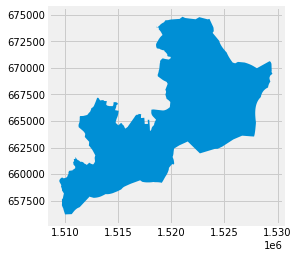

In [16]:
shp.plot()
shp.show()

In [96]:
shp_prim.to_csv('gs://aes-datahub-0001-raw/TCMS/DPLshapefiles/Primary.csv', index = False, )

TypeError: __init__() got an unexpected keyword argument 'errors'